<a href="https://colab.research.google.com/github/byrcewang/DL_SS2H/blob/main/Keras_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Transformer architecture hyperparameters
num_layers = 6 # number of encoder/decoder layers
d_model = 512 # dimension of embedding layers
num_heads = 8 # number of attention heads
dff = 2048 # dimension of feedforward network
# Define constant
MAX_LENGTH = 200

# Input Embedding Layer
inputs = layers.Input(shape=(MAX_LENGTH,))
embedding = layers.Embedding(vocab_size, d_model)(inputs)

# Positional Encoding
# Since transformer has no recurrence, we need to give the model a sense of order
pos_encoding = keras.Sequential([
    layers.Dense(d_model), # map inputs to d_model dimension
    layers.LayerNormalization(epsilon=1e-6), # apply layer normalization
    layers.Activation('relu') # apply ReLU activation
])

encodings = pos_encoding(embedding)

# Encoder
for i in range(num_layers):
  # Multi-head self-attention
  attn_out = layers.MultiHeadAttention(
      num_heads=num_heads,
      key_dim=d_model // num_heads
  )(encodings, encodings, encodings)

  # Residual connection followed by layer normalization
  encodings = layers.Add()([encodings, attn_out])
  encodings = layers.LayerNormalization(epsilon=1e-6)(encodings)

  # Feedforward network
  ff = keras.Sequential([
      layers.Dense(dff, activation='relu'),
      layers.Dense(d_model)
  ])
  ff_out = ff(encodings)

  # Residual connection followed by layer normalization
  encodings = layers.Add()([encodings, ff_out])
  encodings = layers.LayerNormalization(epsilon=1e-6)(encodings)

# Decoder
# Same structure as encoder except:
# 1) Self-attention layer takes encoder outputs as key and value
# 2) Added masked multi-head attention layer

# Output Embedding Layer
outputs = layers.Dense(vocab_size, activation='softmax')(encodings)

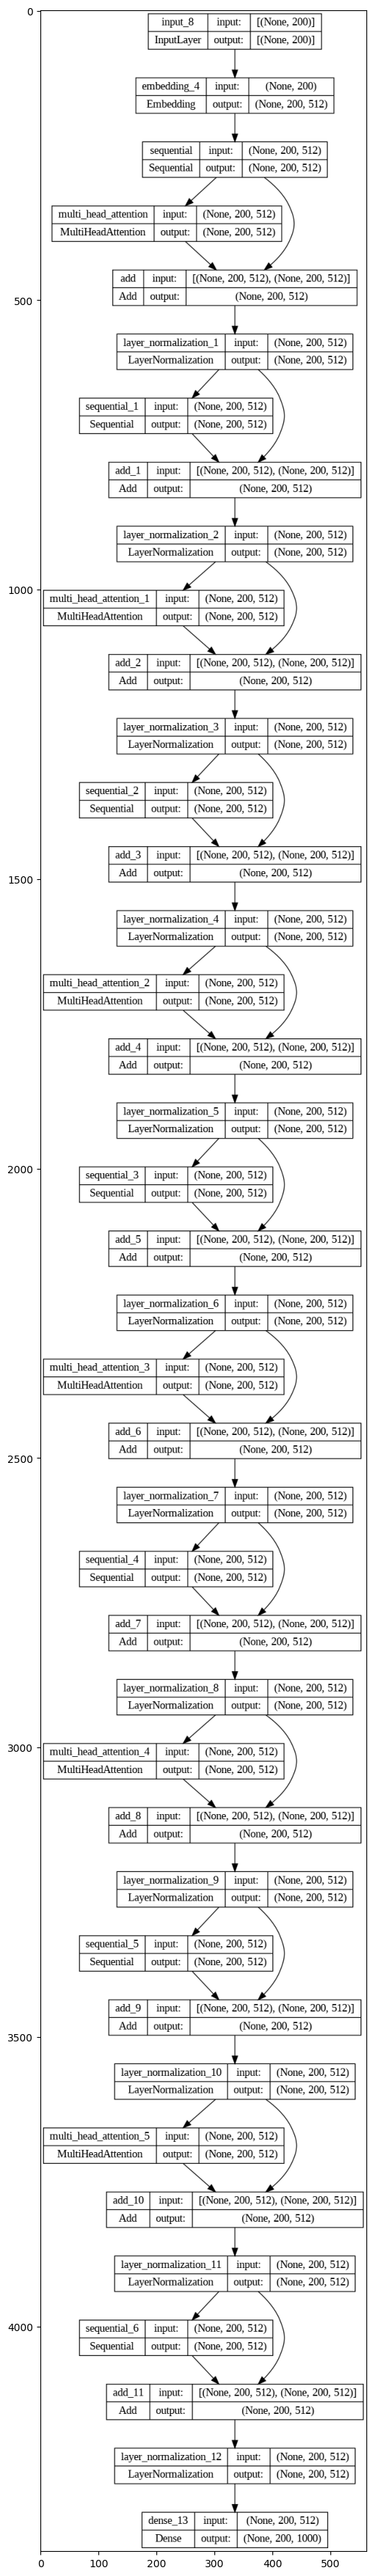

In [35]:
# Create the model
model = keras.Model(inputs=inputs, outputs=outputs, name='transformer')

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
#model.fit(train_data, epochs=10)

# Visualize model architecture
keras.utils.plot_model(model, 'transformer.png', show_shapes=True)

import matplotlib.pyplot as plt

img = plt.imread('/content/transformer.png')
plt.figure(figsize=(50,45))
plt.imshow(img)
plt.show()

In [29]:
# Get number of parameters in model
model.count_params()

20202984